Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [23]:
COLLABORATORS = ""

---

In [24]:
%matplotlib notebook

In [25]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-warning">In this problem, you will create one- and multi-layer neural networks and explore their capabilities. These problems use ideas introduced in the readings:
<ol>
<li> _AIMA3_, pages 727-731, or _AIMA2_, pages 736-744.
<li> Elman, J., Bates, E., Karmiloff-Smith, A., Johnson, M., Parisi, D., & Plunkett, K. (1996). _Rethinking innateness: Development in a connectionist perspective._ Cambridge, MA: MIT Press. Chapter 2.
</ol>
</div>

---
## Part A (1 point)

You will first train a one-layer feedforward neural network (a
"perceptron") to perform the function of the logical OR and XOR operators. The perceptron will be trained on a set of input and output data that you define. Each input variable is in the form of a row-vector of 1's and -1's, which stand for true and false. Note that this is different from the convention we have been using so far in the course: false values are represented with -1 rather than 0, and different columns correspond to different training examples. For instance, the input variable `A` of the function `A OR B` might be `[-1, -1, 1, 1]` where the first element is the value of `A` in the first training example, the second element is the value of `A` in the second training example, and so on. Likewise, the second input variable `B` and the output variable are also row-vectors of `1`s and `-1`s. Hence, your training set needs to be specified using two matrices. The input matrix has *m* columns, where *m* is the number of training examples. The output has one row of length *m*.

Here is an example of an input matrix that would be appropriate in a training set for the logical AND
operator:

$$ 
\begin{bmatrix}
-1 & -1 &  1 & 1 \\
-1 &  1 & -1 & 1 
\end{bmatrix} 
$$
The first row corresponds to the variable `A` and the second row corresponds to the variable `B` in `A AND B`.

And here is the corresponding output for the training set which represents the corresponding values of `A AND B`:

$$ 
\begin{bmatrix}
-1 & -1 & -1 & 1 \\
\end{bmatrix} 
$$

<div class="alert alert-success">Define the training sets for the OR and XOR operators as the truth table for the logical OR operator and the logical XOR operator, respectively.
</div>

*Hint*: The example above does the same thing for the AND operator.

In [26]:
def create_inputs():    
    """
    Returns the training set inputs based on the truth table.
    
    Parameters
    ----------
    None

    Returns
    -------
    An array with shape (2, 4).

    """
    return np.array([[-1, -1, 1, 1], [-1,1,-1,1]])

In [27]:
def create_outputs_OR():
    """
    Returns the training outputs based on the truth table for the OR operator.
    
    Parameters
    ----------
    None

    Returns
    -------
    An array with shape (4,).

    """
    return np.array([-1, 1, 1, 1])

In [28]:
def create_outputs_XOR():
    """
    Returns the training outputs based on the truth table for the XOR operator.
    
    Parameters
    ----------
    None

    Returns
    -------
    An array with shape (4,).

    """
    return np.array([-1, 1, 1, -1])

Let's see if the inputs and outputs are correct.

In [29]:
inputs = create_inputs()
outputs_OR = create_outputs_OR()
outputs_XOR = create_outputs_XOR()

In [30]:
# Create the inputs and outputs
inputs = create_inputs()
outputs_OR = create_outputs_OR()
outputs_XOR = create_outputs_XOR()

# Check that inputs and outputs are the correct shapes.
assert(inputs.shape == (2, 4))
assert(outputs_OR.shape == (4,))
assert(outputs_XOR.shape == (4,))

# Check that inputs and outputs match the logical operators.
inputs_bool = ((inputs + 1) / 2).astype(bool)
outputs_OR_bool = ((outputs_OR + 1) / 2).astype(bool)
outputs_XOR_bool = ((outputs_XOR + 1) / 2).astype(bool)
assert((np.logical_or(inputs_bool[0, :], inputs_bool[1, :]) == outputs_OR_bool).all())
assert((np.logical_xor(inputs_bool[0, :], inputs_bool[1, :]) == outputs_XOR_bool).all())
print("Success!")

Success!


---
## Part B (1.5 points)

The perceptron, which is a simple one-layer neural network, can be created and trained by calling the function `train_perceptron`. This function takes three arguments:

+ `X` — the training input matrix
+ `Y` — the training output vector
+ `bias` — a weight which you can think of as the weight for an extra input that always
takes the value $1$ (i.e. it determines the baseline activation of the
output when receiving no input).


`train_perceptron` returns a tuple `(weights, beta)` — the vector of weights and the learned bias weight.   

Using `inputs` and `outputs_OR` that you defined in Part A, and setting `bias = 0`, let's train a one-layer feedforward neural net and return the weights:

<IPython.core.display.Javascript object>


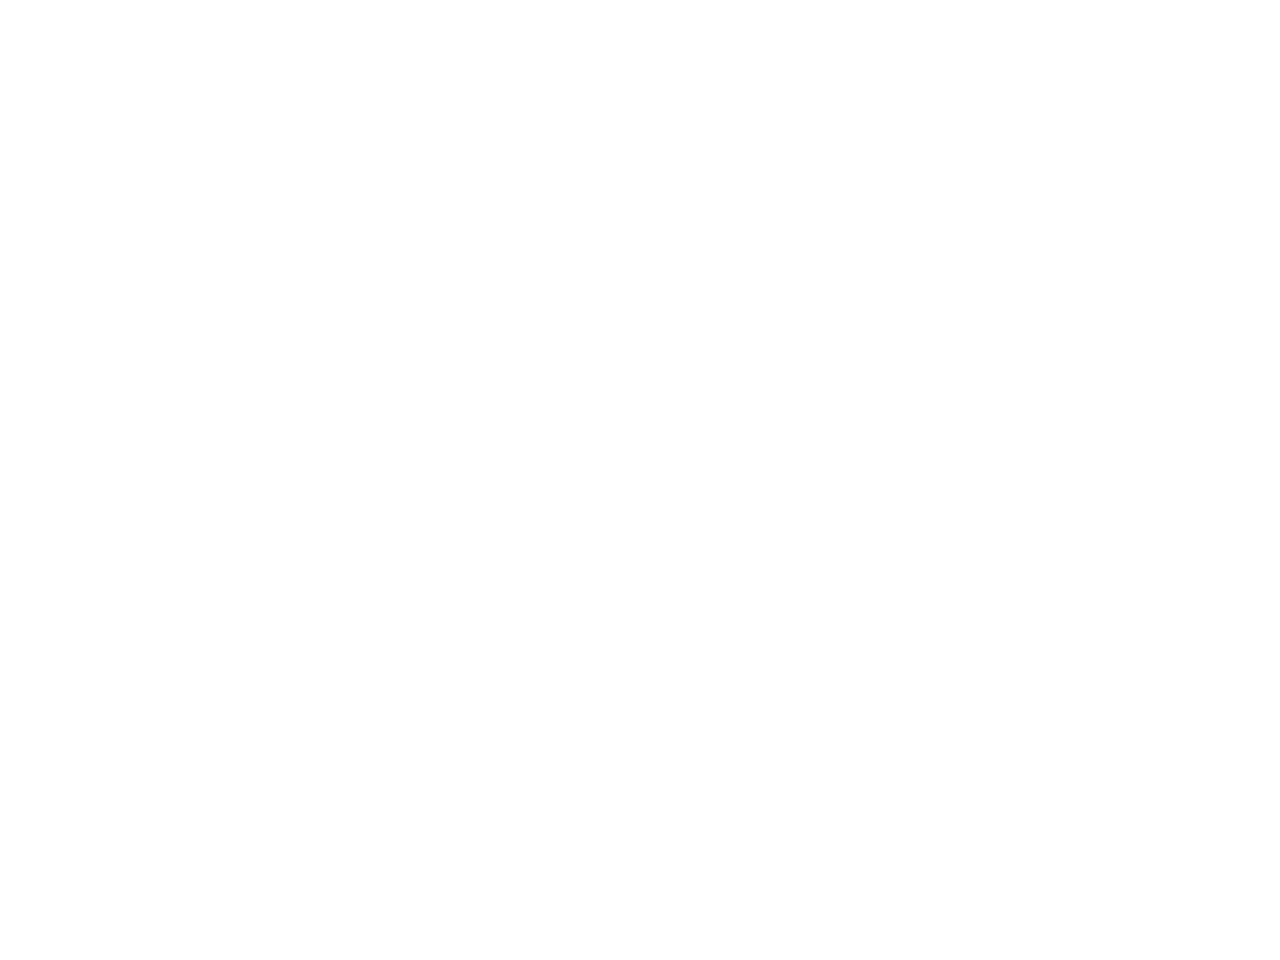

In [31]:
from train_perceptron import train_perceptron
(weights_OR, beta) = train_perceptron(inputs, outputs_OR, bias=0, num_loops=10, plot=True)

After training the above perceptron, these are the weights and bias that we get:

In [32]:
weights_OR, beta

(array([ 2.08374282,  2.08374282]), 2.0307187753881486)

Recall that in this one-layer network, the output of the network is
\begin{align}
y = \text{tanh}(w_1x_1 + w_2x_2 + b)
\end{align}

where $x_1$ and $x_2$ are the values of the inputs, $w_1$ and $w_2$
are the values of the corresponding weights, $b$ is the bias weight. tanh() is a hyperbolic tangent function which produces positive outputs when its input is greater than 0.5 and negative outputs when its input is less than 0.5.

Let's plot the $\text{tanh}$ function to remember exactly what it does. Run the cell below:

<IPython.core.display.Javascript object>


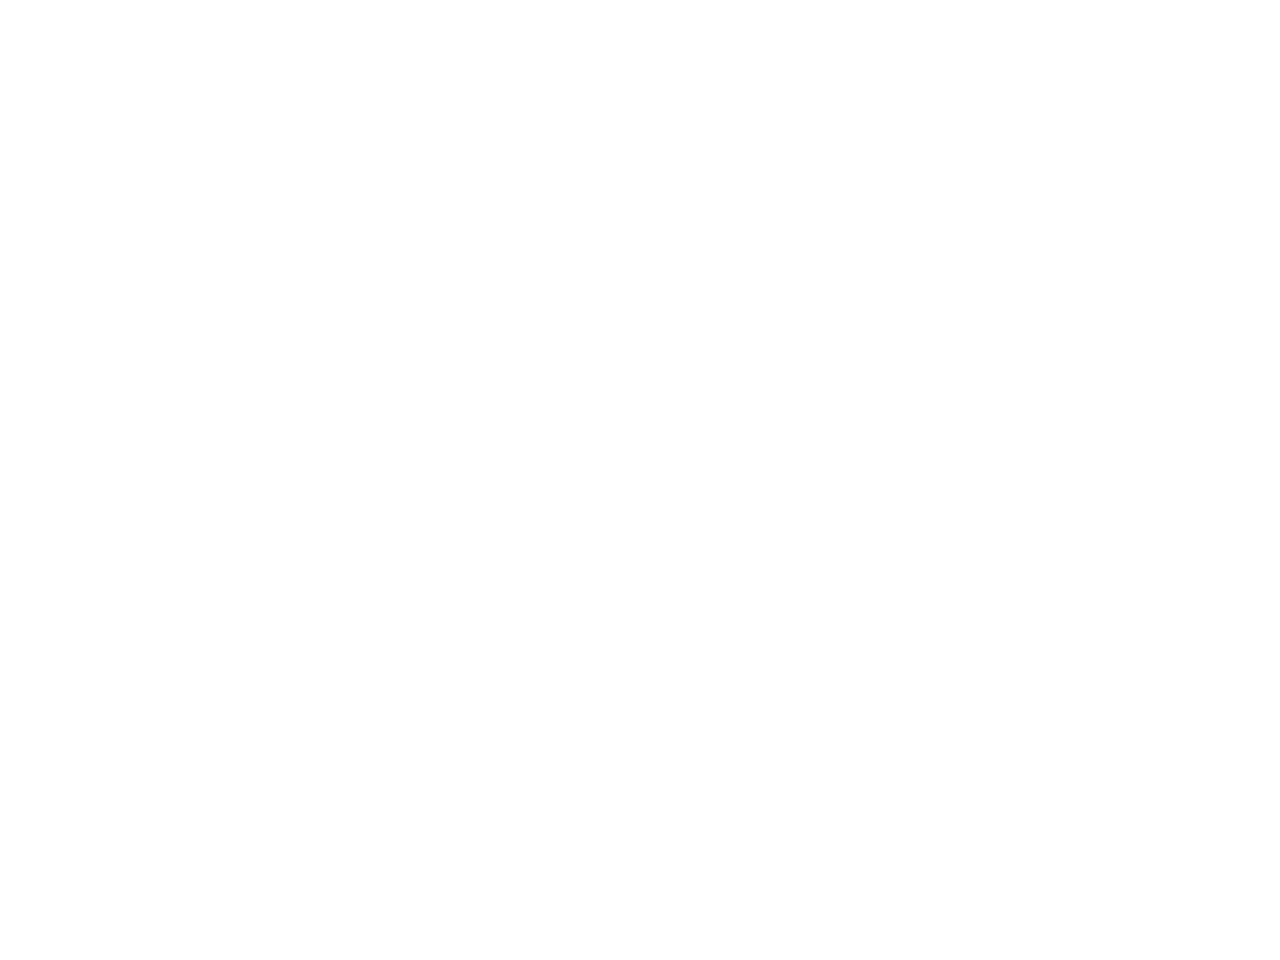

(<matplotlib.legend.Legend at 0x7fb4be51ea90>, None)

In [33]:
x = np.linspace(-5, 5, 1000)
plt.figure()
plt.title("Visualizing the tanh function")
plt.plot(x, np.tanh(x), label="$y=tanh(x)$")
plt.legend(), plt.show()

<div class="alert alert-success">Implement the one-layer network equation above to compute the output of the perceptron.</div>

*Hint*: You can use `np.tanh` to compute the hyperbolic tangent.

In [34]:
def perceptron_output(x1, x2, weight1, weight2, bias):
    """Compute the output of a perceptron.
    
    Hint: your solution can be done in 1 line of code (including
    the return statement).

    Parameters
    ----------
    x1, x2 : input values
    weight1, weight2: weights
    bias: the bias

    Returns
    -------
    scalar : the output of the perceptron.

    """
    return np.tanh(weight1*x1 + weight2* x2 + bias)

In [35]:
np.testing.assert_almost_equal(perceptron_output(1, 1, 1, 1, 1), 0.995054753687)
np.testing.assert_almost_equal(perceptron_output(0, 0, 0, 0, 0), 0)
np.testing.assert_almost_equal(perceptron_output(-1, -1, -1, -1, -1), 0.761594155956)
print("Success!")

Success!


<div class="alert alert-success">Now, use `train_perceptron` and `perceptron_output` to first train the perceptron, and then compute it's final output for the given set of inputs.
</div>

In [36]:
def prediction(inputs, outputs):
    """Train a perceptron on the given inputs and outputs, and
    return its final prediction for the inputs.
    
    Parameters
    ----------
    inputs : numpy array
        A numpy array with shape (2,n) containing -1 and 1
    outputs : numpy array
        A numpy array with shape (n,) containing -1 and 1
        
    Returns
    -------
    numpy array
        A numpy array with shape (n,) corresponding to the network
        predictions for each input.

    """
    # YOUR CODE HERE
    trainer =  train_perceptron(inputs, outputs, 0)
    return perceptron_output(inputs[0], inputs[1], trainer[0][0], trainer[0][1], trainer[1])

In [37]:
# add your own test cases here!


In [38]:
# create inputs and outputs
inputs = create_inputs()
outputs_OR = create_outputs_OR()
outputs_XOR = create_outputs_XOR()

# compute the prediction for OR
out = prediction(inputs, outputs_OR)

# Check that it is the correct shape.
assert(out.shape == (4,))

# Check that values are correct.
np.testing.assert_almost_equal(sum(out), 1.99529701363)
np.testing.assert_almost_equal(np.prod(out), -0.985958595232)

# compute the prediction for XOR
out = prediction(inputs, outputs_XOR)

# Check that it is the correct shape.
assert(out.shape == (4,))

# Check that values are correct.
np.testing.assert_almost_equal(sum(out), 0)
np.testing.assert_almost_equal(np.prod(out), 0.840547830147)

# Check that `train_perceptron` was used
old_train_perceptron = train_perceptron
del train_perceptron
try:
    prediction(inputs, outputs_OR)
except NameError:
    pass
else:
    raise AssertionError("prediction does not call the train_perceptron function")
finally:
    train_perceptron = old_train_perceptron
    del old_train_perceptron

# Check that `perceptron_output` was used
old_perceptron_output = perceptron_output
del perceptron_output
try:
    prediction(inputs, outputs_OR)
except NameError:
    pass
else:
    raise AssertionError("prediction does not call the perceptron_output function")
finally:
    perceptron_output = old_perceptron_output
    del old_perceptron_output

print("Success!")

Success!


Once you've finished with your function, you should be able to train a perceptron on the OR outputs and see what it predicts:

In [39]:
inputs = create_inputs()
outputs_OR = create_outputs_OR()

print("Correct OR outputs: " + str(outputs_OR))
print("Trained OR outputs: " + str(prediction(inputs, outputs_OR)))

Correct OR outputs: [-1  1  1  1]
Trained OR outputs: [-0.99529767  0.99529736  0.99529736  0.99999997]


<div class="alert alert-success">Was the single-layer perceptron able to learn the OR function? Why is it that the single-layer perceptron can/cannot solve this problem?</div>

Yes, the single layer perceptron was able to learn the OR function properly. A single layer can solve this problem because the data is linearly separable. 

---
## Part C (0.5 points)

Can we learn XOR using the same network architecture? Let's train a new one-layer feedforward neural net using the variables `inputs`, `outpus_XOR`, and `bias = 0`:

<IPython.core.display.Javascript object>


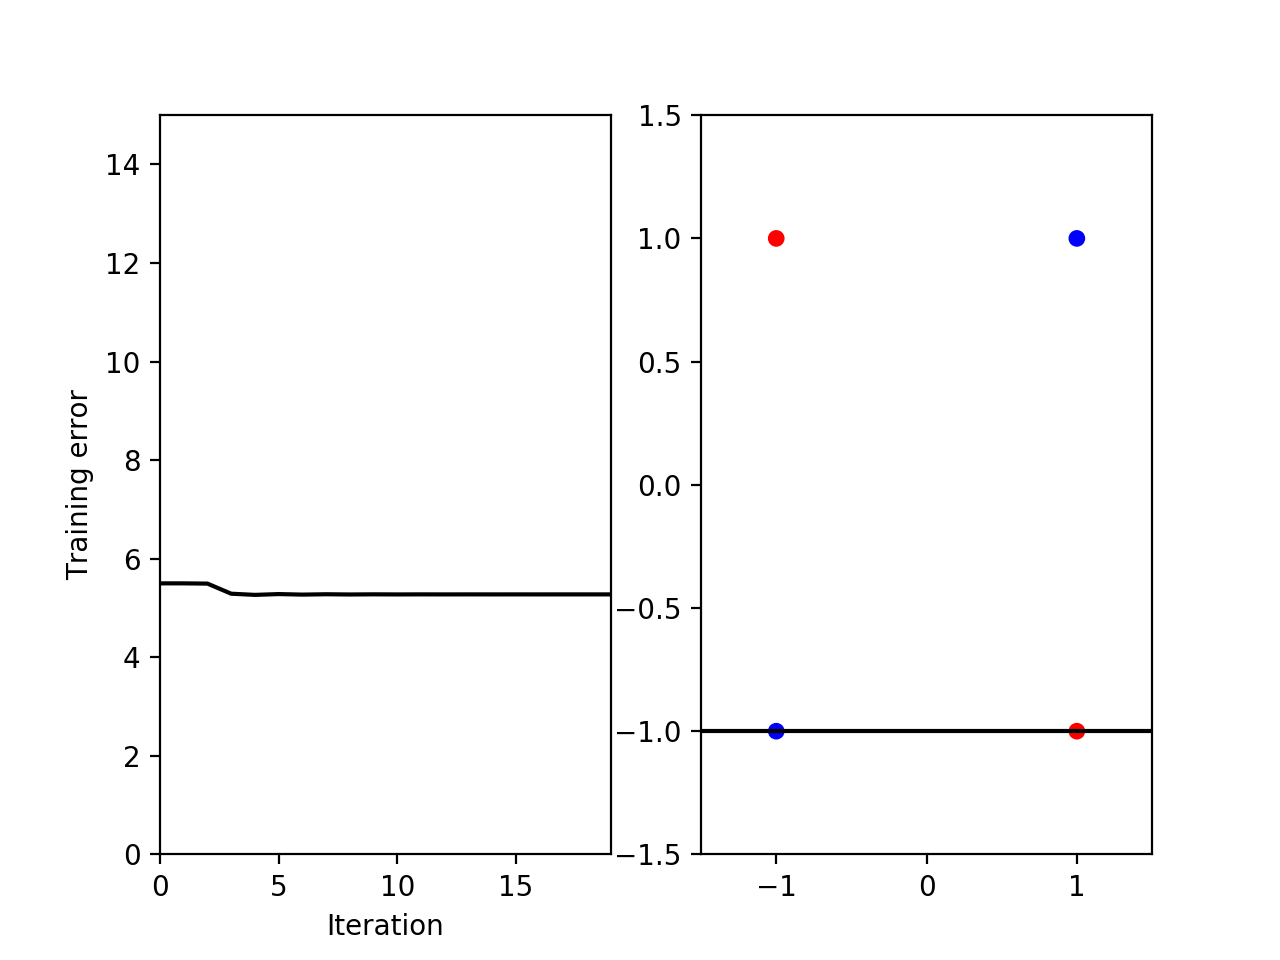

In [40]:
train_perceptron(inputs, outputs_XOR, bias=0, num_loops=20, plot=True);

Using the outputs you computed for XOR, let's run your prediction function to see what the final numerical predictions are for XOR:

In [41]:
inputs = create_inputs()
outputs_XOR = create_outputs_XOR()

print("Correct XOR outputs: " + str(outputs_XOR))
print("Trained XOR outputs: " + str(prediction(inputs, outputs_XOR)))

Correct XOR outputs: [-1  1  1 -1]
Trained XOR outputs: [ 0.95750402 -0.95750402  0.95750402 -0.95750402]


<div class="alert alert-success">Was the single-layer perceptron able to learn the XOR function? Why does it perform this way?</div>

No, it was not able to learn the XOR function because the function is not linearly separable. It performs this way because it cannot split up / classify the points with a linear line, thus making it impossible to learn the XOR function with a single-layer.

---
## Part D (1 point)

Can we learn XOR using a two-layer feedforward network like the following?

![Network structure with one hidden layer.](images/NetworkDiagram.png)

To find out, we will train a two-layer feedforward network with the function `train_multilayer_perceptron()`. 

`train_multilayer_perceptron()` takes four arguments:

* `X` — the training input matrix
* `Y` — the training output vector
* `num_iter` — the number of iterations to run 

`train_multilayer_perceptron()` returns two outputs. The first is a tuple of the weight matrices for the first and second layers, and the second is a tuple of the bias terms for the first and second layers. 

Using the variables `inputs` and `outputs_XOR` that you used in Part C, we will train a two-layer feedforward neural net (a network with one hidden layer) below. Note that this may take a few moments to run.

In [42]:
from multilayer_perceptron import train_multilayer_perceptron

weights, bias = train_multilayer_perceptron(inputs, outputs_XOR, num_iters=20000)

print("Layer 1 weights: " + str(weights[0]))
print("Layer 1 bias:    " + str(bias[0]))
print("Layer 2 weights: " + str(weights[1]))
print("Layer 2 bias:    " + str(bias[1]))

Layer 1 weights: [[ 1.2205569   1.217108  ]
 [ 1.07019487  1.06703989]]
Layer 1 bias:    [ 0.80295544 -0.77042119]
Layer 2 weights: [[ 2.51158136 -2.58113351]]
Layer 2 bias:    [-1.70700142]


Now let's calculate the predicted output values given the input and the trained model using the function `predict_multilayer_perceptron()`.  `predict_multilayer_perceptron()` is provided because the calculation is somewhat more complex than the analogous operation with single-layer feedforward networks that we asked you to write in Parts B and C. `predict_multilayer_perceptron()` takes three arguments:

* `input` — the training input matrix
* `weights` — a tuple of weights for each layer
* `bias` — a tuple of bias terms for each layer

`predict_multilayer_perceptron()` returns a vector of output values given the trained net and the input.

Let's compute the prediction for the XOR outputs that we just trained on:

In [43]:
from multilayer_perceptron import predict_multilayer_perceptron

out = predict_multilayer_perceptron(inputs, weights, bias)

print("Correct XOR outputs: " + str(outputs_XOR))
print("Trained XOR outputs: " + str(out))

Correct XOR outputs: [-1  1  1 -1]
Trained XOR outputs: [-0.89934253  0.92680619  0.92683185 -0.89943344]


<div class="alert alert-success">Was the multi-layer perceptron able to learn the XOR function? Explain why or why not.</div>

Yes, the multi-layer perceptron was able to learn the XOR function. This is because using the hidden layers, the neural network can remap the inputs into a new space where they can be linearly separable, then use those hidden layers to give the correct predicted output.

<div class="alert alert-success">How does the behavior of the multi-layer perceptron compare to that of the single-layer perceptron on the same input data?</div>

It peforms much better than a single-layer perceptron only in the case where the data is not linearly separable. If the data is linearly separable to begin with, then adding hidden layers will not give much of an advantage. However, as we saw for the XOR function, the single layer network was unable to learn given the challenge of linear separability that the multilayer network could solve.

---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [44]:
print("No errors!")

No errors!
